# Semester Project 

In [1]:
# import needed modules
import pandas as pd
import numpy as np
import datetime as dt
from datetime import time
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
# load in & examine the data!
dog_park = pd.read_csv("dogparkdata_2012to2018.csv")
dog_park.head()

,Unnamed: 0,names,times,valid
0,0,bdjdaabeacjjbibbafjcjdjfaibib,1/1/2012 8:31:46AM,Valid Access
1,1,abjejijgjejjbiagjebib,1/1/2012 10:27:20AM,Valid Access
2,2,abjejijgjejjbiagjebib,1/1/2012 10:52:26AM,Valid Access
3,3,jeaajfaijijdjjbijdjcbdjcbbbbaabib,1/1/2012 10:52:48AM,Valid Access
4,4,jeaajfaijijdjjbijdjcbdjcbbbbaabib,1/1/2012 11:19:56AM,Valid Access


In [3]:
# make the data more readable
# make dataframe into an array & split based on year
dog_park_array = np.array(dog_park)
data_2012 = dog_park_array[0:10891]
data_2013 = dog_park_array[10891:20945]
data_2014 = dog_park_array[20945: 32605]
data_2015 = dog_park_array[32605: 49340]
data_2016 = dog_park_array[49340:70150]
data_2017 = dog_park_array[70150:87560]
data_2018 = dog_park_array[87560:110066]

In [4]:
# deal with the yucky date/time string
# this function will create an array with the correct times in military time in the format [hour, minute, second]
def correct_time(array):
    correct_times = []
    for i in range(0,len(array)):
        date_time = array[i][2] 
        time = date_time[-10:-2]
        am_pm = date_time[-2]
        minute = int(time[3:5])
        second = int(time[6:8])
        hour = int(time[0:2]) 
        if am_pm == 'A' and hour != 12:
            correct_times.append([hour, minute,second])
        elif am_pm == 'P'and hour != 12:
            hour += 12
            correct_times.append([hour, minute, second])
        elif am_pm == 'A' and hour == 12:
            hour = 0
            correct_times.append([hour, minute, second])
        elif am_pm == 'P' and hour == 12:
            hour = 12
            correct_times.append([hour,minute,second])
    return(correct_times)    

In [5]:
# dealing with the yucky date/time string continued
# this function will create an array with the correct date in the format [month, day, year]
def correct_date(array):
    correct_dates = []
    for i in range(0, len(array)):
        date_time = array[i][2]
        date = date_time[0:10]
        find_month = date.partition('/')
        month = int(find_month[0])
        find_day = find_month[2].partition('/')
        day = int(find_day[0])
        year = int(find_day[2])
        correct_dates.append([month,day,year])
    return(correct_dates)

In [216]:
times_2012 = correct_time(data_2012)
dates_2012 = correct_date(data_2012)
times_2013 = correct_time(data_2013)
dates_2013 = correct_date(data_2013)
times_2014 = correct_time(data_2014)
dates_2014 = correct_date(data_2014)
times_2015 = correct_time(data_2015)
dates_2015 = correct_date(data_2015)
times_2016 = correct_time(data_2016)
dates_2016 = correct_date(data_2016)
times_2017 = correct_time(data_2017)
dates_2017 = correct_date(data_2017)
times_2018 = correct_time(data_2018)
dates_2018 = correct_date(data_2018)
dates_2012

[[1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 20

In [7]:
# now we need to get into the real stuff, finding the times that people were at the park
# first, we will define a function that determines what indices have the date we want

def find_indices(month,day,year,date_array):
    begin = date_array.index([month,day,year])
    end = date_array.index([month,day+1,year]) 
    return(begin,end)

#test!
find_indices(2,14,2017,dates_2017)
#this will return 2 numbers, the first one is the first entry of 2/14/2017, and the second one is the last entry

(1846, 1893)

Text(0,0.5,'Total Scans')

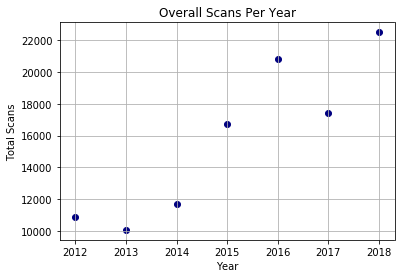

In [8]:
#Modeling number of scans per year
scans_per_year = [len(dates_2012),len(dates_2013),len(dates_2014),len(dates_2015), len(dates_2016),len(dates_2017),len(dates_2018)]
year = [2012,2013,2014,2015,2016,2017,2018]
plt.scatter(year,scans_per_year,color = "navy")
plt.grid()
plt.title("Overall Scans Per Year")
plt.xlabel("Year")
plt.ylabel("Total Scans")

In [9]:
def unique(dates):
    unique_dates = []
    for date in dates:
        if date not in unique_dates:
            unique_dates.append(date)
    return unique_dates
            
unique_dates = unique(dates_2012)

In [10]:
def userid(array):
    ids = []
    for i in range (0,len(array)):
        name = array[i][1]
        ids.append(name)
        
    return ids
        

In [11]:
users_2012 = userid(data_2012)
users_2013 = userid(data_2013)
users_2014 = userid(data_2014)
users_2015 = userid(data_2015)
users_2016 = userid(data_2016)
users_2017 = userid(data_2017)
users_2018 = userid(data_2018)

In [12]:
    if len(indices) == 1:
        ent_exit = time_array[indices[0]]
        if ent_exit[1] >= 30:
            enter = [ent_exit[0],ent_exit[1]-30,ent_exit[2]]
            exit = [ent_exit[0]+1,60-ent_exit[1],ent_exit[2]]
        elif ent_exit[1] < 30:
            enter = [ent_exit[0]-1, 60 - ent_exit[1],ent_exit[2]]
            exit = [ent_exit[0],ent_exit[1] + 30, ent_exit[2]]
        return enter,exit    
    elif len(indices) == 2:
        enter = time_array[indices[0]]
        exit = time_array[indices[1]]
        return enter,exit
    else:
        return("there was an error")
    
    
    
def round_enter_exit_times(enter,exit):
    if enter[1] < 15:
        rounded_enter = enter[0]
    elif enter[1] >= 15 and enter[1] < 45:
        rounded_enter = enter[0]+.5
    elif enter[1] >= 45:
        rounded_enter = enter[0]+1
        
        
    if enter[1] < 15:
        rounded_exit = exit[0]
    elif enter[1] >= 15 and enter[1] < 45:
        rounded_exit = exit[0]+.5
    elif enter[1] >= 45: 
        rounded_exit = exit[0]+1  
     
    return(enter,exit,rounded_enter,rounded_exit)

IndentationError: expected an indented block (<ipython-input-12-e42cf56beb9e>, line 20)

In [13]:
def unique(dates):
    unique_dates = []
    for date in dates:
        if date not in unique_dates:
            unique_dates.append(date)
    return unique_dates

In [14]:
begin,end = find_indices(2,14,2016,dates_2016)
times_2016[1603:1629]

[[8, 15, 59],
 [8, 42, 27],
 [10, 24, 43],
 [10, 40, 22],
 [11, 10, 50],
 [11, 28, 56],
 [11, 51, 28],
 [12, 2, 16],
 [12, 56, 18],
 [15, 32, 54],
 [15, 39, 32],
 [15, 41, 46],
 [15, 49, 35],
 [15, 50, 55],
 [16, 6, 41],
 [16, 9, 43],
 [16, 33, 28],
 [16, 38, 27],
 [16, 45, 40],
 [16, 46, 34],
 [17, 0, 30],
 [17, 9, 7],
 [17, 18, 9],
 [17, 26, 14],
 [17, 33, 48],
 [17, 52, 18]]

In [15]:
unique(oct2013)

NameError: name 'oct2013' is not defined

In [16]:
#2012 is all good
#april 2013 is missing 4/10-4/17
#july 2013 is missing 7/19 - end
 
    
#Needs fixed
#july-august bound 2013



In [17]:
def when_was_i_there(user_id, day_array, time_array):
    all_users = userid(day_array)
    indices = []
    for i in range(0,len(all_users)):
        if all_users[i] == user_id:
            indices.append(i)
    return(indices)

In [18]:
jan2012 = dates_2012[0:662]
feb2012 = dates_2012[663:1389]
mar2012 = dates_2012[1390:2303]
apr2012 = dates_2012[2304:3207]
may2012 = dates_2012[3208:4190]
jun2012 = dates_2012[4191:5048]
jul2012 = dates_2012[5049:5998]
aug2012 = dates_2012[5999:6871]
sep2012 = dates_2012[6872:8012]
oct2012 = dates_2012[8013:9021]
nov2012 = dates_2012[9022:10034]
dec2012 = dates_2012[10035:]

jan2013 = dates_2013[0:848]
feb2013 = dates_2013[849:1733]
mar2013 = dates_2013[1734:2667]
apr2013 = dates_2013[2668:3426]
may2013 = dates_2013[3427:4578]
jun2013 = dates_2013[4579:5792]
jul2013 = dates_2013[5793:6468]
aug2013 = dates_2013[6469:8183]
oct2013 = dates_2013[8184:8292]
nov2013 = dates_2013[8293:9341]
dec2013 = dates_2013[9342:]

jan2014 = dates_2014[0:774]
feb2014 = dates_2014[775:1656]
mar2014 = dates_2014[1657:2684]
apr2014 = dates_2014[2685:4034]
may2014 = dates_2014[4035:5445]
jun2014 = dates_2014[5446:6788]
jul2014 = dates_2014[6789:8456]
aug2014 = dates_2014[8457:9721]
sep2014 = dates_2014[9722:11226]
oct2014 = dates_2014[11227:11660]

jan2015 = dates_2015[0:1028]
feb2015 = dates_2015[1029:1561]
mar2015 = dates_2015[1562:2548]
apr2015 = dates_2015[2549:3946]
may2015 = dates_2015[3947:5480]
jun2015 = dates_2015[5481:7084]
jul2015 = dates_2015[7085:8545]
aug2015 = dates_2015[8546:10349]
sep2015 = dates_2015[10350:12125] 
oct2015 = dates_2015[12126:13767]
nov2015 = dates_2015[13768:15448]
dec2015 = dates_2015[15449:]

jan2016 = dates_2016[0:1181]
feb2016 = dates_2016[1182:2261]
mar2016 = dates_2016[2262:3556]
apr2016 = dates_2016[3557:5409]
may2016 = dates_2016[5410:7417]
jun2016 = dates_2016[7418:9908]
jul2016 = dates_2016[9909:12303]
aug2016 = dates_2016[12304:14375]
sep2016 = dates_2016[14376:16134]
oct2016 = dates_2016[16135:17882]
nov2016 = dates_2016[17883:19686]
dec2016 = dates_2016[19687:]


#2017

jan2017 = dates_2017[0:1193]
feb2017 = dates_2017[1194:2797]
mar2017 = dates_2017[2798:4390]
apr2017 = dates_2017[4391:6400]
may2017 = dates_2017[6401:8534]
jun2017 = dates_2017[8535:9952]
jul2017 = dates_2017[9953:10351]
aug2017 = dates_2017[10352:12634]
sep2017 = dates_2017[12635:14416]
oct2017 = dates_2017[14417:14706]
nov2017 = dates_2017[14707:15941] 
dec2017 = dates_2017[15942:]

#June2017 - missing 28
#Jul2017 - missing 10, 12, 13
#Sept2017 - missing 21-30
#Oct2017 - missing 1-10, 15-17, 22, 23, 27, 30
#Nov2017 - missing 2, 4-6

In [19]:
find_indices(10,11,2017,dates_2017)

(14417, 14443)

[[10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 11, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017],
 [10, 12, 2017

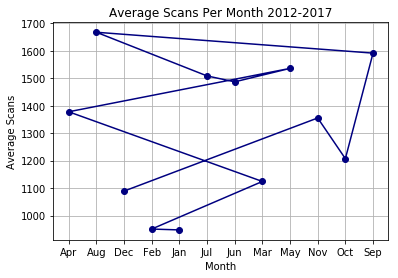

In [20]:
z1 = (len(jan2012) + len(jan2013) + len(jan2014) + len(jan2015)+ len(jan2016) + len(jan2017))/6
z2 = (len(feb2012) + len(feb2013) + len(feb2014) + len(feb2015)+ len(feb2016) + len(feb2017))/6
z3 = (len(mar2012) + len(mar2013) + len(mar2014) + len(mar2015)+ len(mar2016) + len(mar2017))/6
z4 = (len(apr2012) + len(apr2013) + len(apr2014) + len(apr2015)+ len(apr2016) + len(apr2017))/6
z5 = (len(may2012) + len(may2013) + len(may2014) + len(may2015)+ len(may2016) + len(may2017))/6
z6 = (len(jun2012) + len(jun2013) + len(jun2014) + len(jun2015)+ len(jun2016) + len(jun2017))/6
z7 = (len(jul2012) + len(jul2013) + len(jul2014) + len(jul2015)+ len(jul2016) + len(jul2017))/5
z8 = (len(aug2012) + len(aug2013) + len(aug2014) + len(aug2015)+ len(aug2016) + len(aug2017))/6
z9 = (len(sep2012) + len(sep2014) + len(sep2015)+ len(sep2016) + len(sep2017))/5
z10 = (len(oct2012) + len(oct2014) + len(oct2015)+ len(oct2016))/4
z11 = (len(nov2012) + len(nov2013) + len(nov2015)+ len(nov2016) + len(nov2017))/5
z12 = (len(dec2012) + len(dec2013) + len(dec2015)+ len(dec2016) + len(dec2017))/5



ys = [z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12]
xs = ["Jan","Feb","Mar","Apr",'May',"Jun",'Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(xs,ys,marker = 'o',color = 'navy',label = '2017')
plt.grid()
plt.title("Average Scans Per Month 2012-2017")
plt.xlabel("Month")
plt.ylabel("Average Scans")
oct2017

SyntaxError: unexpected EOF while parsing (<ipython-input-21-c3edfbc23d10>, line 6)

In [22]:
april2012 = dates_2012[2304:3207] #1 is sunday
april2013 = dates_2013[2668:3426] #monday
april2014 = dates_2014[2685:4034] #tuesday
april2015 = dates_2015[2549:3946] #wednesday
april2016 = dates_2016[3557:5409] #friday
april2017 = dates_2017[4391:6400] #saturday
april2018 = dates_2018[5215:7870]#sunday
sundays = 0
mondays = 0 
tuesdays = 0
wednesdays = 0
thursdays = 0
fridays = 0
saturdays = 0
sundays = 0
for i in range (len(april2012)):
    if april2012[i][1] == 1 or april2012[i][1] == 8 or april2012[i][1] == 15 or april2012[i][1] == 22 or april2012[i][1] == 29:
        sundays += 1
    elif april2012[i][1] == 2 or april2012[i][1] == 9 or april2012[i][1] == 16 or april2012[i][1] == 23 or april2012[i][1] == 30:
        mondays += 1
    elif april2012[i][1] == 3 or april2012[i][1] == 10 or april2012[i][1] == 17 or april2012[i][1] ==24:
        tuesdays += 1
    elif april2012[i][1] == 4 or april2012[i][1] == 11 or april2012[i][1] == 18 or april2012[i][1] == 25:
        wednesdays += 1
    elif april2012[i][1] ==5 or april2012[i][1] == 12 or april2012[i][1] == 19 or april2012[i][1] == 26:
        thursdays += 1
    elif april2012[i][1] == 6 or april2012[i][1] == 13 or april2012[i][1] == 20 or april2012[i][1] == 27:
        fridays += 1
    elif april2012[i][1] == 7 or april2012[i][1] == 14 or april2012[i][1] == 21 or april2012[i][1] == 28:
        saturdays += 1

for i in range (len(april2013)):
    if april2013[i][1] == 1 or april2013[i][1] == 8 or april2013[i][1] == 15 or april2013[i][1] == 22 or april2013[i][1] == 29:
        mondays += 1
    elif april2013[i][1] == 2 or april2013[i][1] == 9 or april2013[i][1] == 16 or april2013[i][1] == 23 or april2013[i][1] == 30:
        tuesdays += 1
    elif april2013[i][1] == 3 or april2013[i][1] == 10 or april2013[i][1] == 17 or april2013[i][1] ==24:
        wednesdays += 1
    elif april2013[i][1] == 4 or april2013[i][1] == 11 or april2013[i][1] == 18 or april2013[i][1] == 25:
        thursdays += 1
    elif april2013[i][1] ==5 or april2013[i][1] == 12 or april2013[i][1] == 19 or april2013[i][1] == 26:
        fridays += 1
    elif april2013[i][1] == 6 or april2013[i][1] == 13 or april2013[i][1] == 20 or april2013[i][1] == 27:
        saturdays += 1
    elif april2013[i][1] == 7 or april2013[i][1] == 14 or april2013[i][1] == 21 or april2013[i][1] == 28:
        sundays += 1     
        
for i in range (len(april2014)):
    if april2014[i][1] == 1 or april2014[i][1] == 8 or april2014[i][1] == 15 or april2014[i][1] == 22 or april2014[i][1] == 29:
        tuesdays += 1
    elif april2014[i][1] == 2 or april2014[i][1] == 9 or april2014[i][1] == 16 or april2014[i][1] == 23 or april2014[i][1] == 30:
        wednesdays += 1
    elif april2014[i][1] == 3 or april2014[i][1] == 10 or april2014[i][1] == 17 or april2014[i][1] ==24:
        thursdays += 1
    elif april2014[i][1] == 4 or april2014[i][1] == 11 or april2014[i][1] == 18 or april2014[i][1] == 25:
        fridays += 1
    elif april2014[i][1] ==5 or april2014[i][1] == 12 or april2014[i][1] == 19 or april2014[i][1] == 26:
        saturdays += 1
    elif april2014[i][1] == 6 or april2014[i][1] == 13 or april2014[i][1] == 20 or april2014[i][1] == 27:
        sundays += 1
    elif april2014[i][1] == 7 or april2014[i][1] == 14 or april2014[i][1] == 21 or april2014[i][1] == 28:
        mondays += 1 

for i in range (len(april2015)):
    if april2015[i][1] == 1 or april2015[i][1] == 8 or april2015[i][1] == 15 or april2015[i][1] == 22 or april2015[i][1] == 29:
        wednesdays += 1
    elif april2015[i][1] == 2 or april2015[i][1] == 9 or april2015[i][1] == 16 or april2015[i][1] == 23 or april2015[i][1] == 30:
        thursdays += 1
    elif april2015[i][1] == 3 or april2015[i][1] == 10 or april2015[i][1] == 17 or april2015[i][1] ==24:
        fridays += 1
    elif april2015[i][1] == 4 or april2015[i][1] == 11 or april2015[i][1] == 18 or april2015[i][1] == 25:
        saturdays += 1
    elif april2015[i][1] ==5 or april2015[i][1] == 12 or april2015[i][1] == 19 or april2015[i][1] == 26:
        sundays += 1
    elif april2015[i][1] == 6 or april2015[i][1] == 13 or april2015[i][1] == 20 or april2015[i][1] == 27:
        mondays += 1
    elif april2015[i][1] == 7 or april2015[i][1] == 14 or april2015[i][1] == 21 or april2015[i][1] == 28:
        tuesdays += 1 
        
        
for i in range (len(april2016)):
    if april2016[i][1] == 1 or april2016[i][1] == 8 or april2016[i][1] == 15 or april2016[i][1] == 22 or april2016[i][1] == 29:
         fridays += 1
    elif april2016[i][1] == 2 or april2016[i][1] == 9 or april2016[i][1] == 16 or april2016[i][1] == 23 or april2016[i][1] == 30:
        saturdays += 1
    elif april2016[i][1] == 3 or april2016[i][1] == 10 or april2016[i][1] == 17 or april2016[i][1] ==24:
        sundays += 1
    elif april2016[i][1] == 4 or april2016[i][1] == 11 or april2016[i][1] == 18 or april2016[i][1] == 25:
        mondays += 1
    elif april2016[i][1] ==5 or april2016[i][1] == 12 or april2016[i][1] == 19 or april2016[i][1] == 26:
        tuesdays += 1
    elif april2016[i][1] == 6 or april2016[i][1] == 13 or april2016[i][1] == 20 or april2016[i][1] == 27:
        wednesdays += 1
    elif april2016[i][1] == 7 or april2016[i][1] == 14 or april2016[i][1] == 21 or april2016[i][1] == 28:
        thursdays += 1 

for i in range (len(april2017)):
    if april2017[i][1] == 1 or april2017[i][1] == 8 or april2017[i][1] == 15 or april2017[i][1] == 22 or april2017[i][1] == 29:
         saturdays += 1
    elif april2017[i][1] == 2 or april2017[i][1] == 9 or april2017[i][1] == 16 or april2017[i][1] == 23 or april2017[i][1] == 30:
        sundays += 1
    elif april2017[i][1] == 3 or april2017[i][1] == 10 or april2017[i][1] == 17 or april2017[i][1] ==24:
        mondays += 1
    elif april2017[i][1] == 4 or april2017[i][1] == 11 or april2017[i][1] == 18 or april2017[i][1] == 25:
        tuesdays += 1
    elif april2017[i][1] ==5 or april2017[i][1] == 12 or april2017[i][1] == 19 or april2017[i][1] == 26:
        wednesdays += 1
    elif april2017[i][1] == 6 or april2017[i][1] == 13 or april2017[i][1] == 20 or april2017[i][1] == 27:
        thursdays += 1
    elif april2017[i][1] == 7 or april2017[i][1] == 14 or april2017[i][1] == 21 or april2017[i][1] == 28:
        fridays += 1   
        
for i in range (len(april2018)):
    if april2018[i][1] == 1 or april2018[i][1] == 8 or april2018[i][1] == 15 or april2018[i][1] == 22 or april2018[i][1] == 29:
         sundays += 1
    elif april2018[i][1] == 2 or april2018[i][1] == 9 or april2018[i][1] == 16 or april2018[i][1] == 23 or april2018[i][1] == 30:
        mondays += 1
    elif april2018[i][1] == 3 or april2018[i][1] == 10 or april2018[i][1] == 17 or april2018[i][1] ==24:
        tuesdays += 1
    elif april2018[i][1] == 4 or april2018[i][1] == 11 or april2018[i][1] == 18 or april2018[i][1] == 25:
        wednesdays += 1
    elif april2018[i][1] ==5 or april2018[i][1] == 12 or april2018[i][1] == 19 or april2018[i][1] == 26:
        thursdays += 1
    elif april2018[i][1] == 6 or april2018[i][1] == 13 or april2018[i][1] == 20 or april2018[i][1] == 27:
        fridays += 1
    elif april2018[i][1] == 7 or april2018[i][1] == 14 or april2018[i][1] == 21 or april2018[i][1] == 28:
        saturdays += 1 
        
avg_mondays = mondays/30
avg_tuesdays= tuesdays/30
avg_wednesdays = wednesdays/30
avg_thursdays = thursdays/30
avg_fridays= fridays/30
avg_saturdays= saturdays/30
avg_sundays = sundays/30

Text(0,0.5,'Number of Scans')

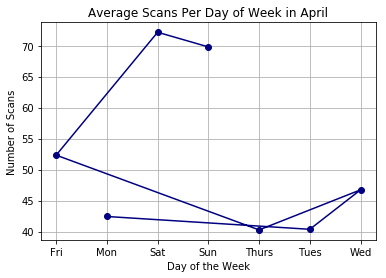

In [218]:
days = [avg_mondays, avg_tuesdays, avg_wednesdays,avg_thursdays, avg_fridays, avg_saturdays, avg_sundays]
y = ["Mon", "Tues", "Wed", "Thurs",'Fri', 'Sat', "Sun" ]
plt.plot(y,days, color = 'navy', marker = 'o')
plt.grid()
plt.title('Average Scans Per Day of Week in April')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Scans")


(25, 100)

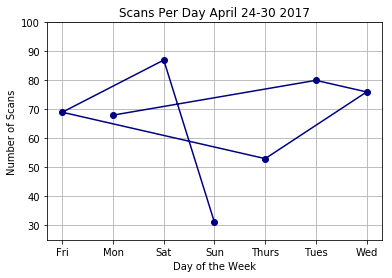

In [157]:
#april 24-30 2017
m24 = len(dates_2017[5930:5998])
t25 = len(dates_2017[5999:6079])
w26 = len(dates_2017[6080:6156])
t27 = len(dates_2017[6157:6210])
f28 = len(dates_2017[6211:6280])
s29 = len(dates_2017[6281:6368])
s30 = len(dates_2017[6369:6400])
ys = [m24,t25,w26,t27,f28,s29,s30]
xs = ["Mon", "Tues", "Wed", "Thurs",'Fri', 'Sat', "Sun" ]
plt.plot(xs,ys, color = 'navy', marker = 'o')
plt.grid()
plt.title('Scans Per Day April 24-30 2017')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Scans")
plt.ylim(25,100)

In [25]:
len(april_2018)

NameError: name 'april_2018' is not defined

In [26]:
#we want to make a histogram of when people were at the dog park

In [ ]:
# I will make a function that takes in 2 arrays:
#1: userid array
#2: time array
#both arrays will be in terms of 1 day and should be the same length.

In [56]:
#this function will be used to make the user id array
def userid(array):
    ids = []
    for i in range (0,len(array)):
        name = array[i][1]
        ids.append(name)
        
    return ids

In [220]:
#example inputs: June 1st, 2016
#find_indices(6,2,2016,dates_2016)
#june1_times = times_2016[7418:7471]
#june1_userid = userid(data_2016[7418:7471])

june2_times = times_2016[7471:7574]
june2_userid = users_2016[7471:7574]

In [170]:
def unique(dates):
    unique_dates = []
    for date in dates:
        if date not in unique_dates:
            unique_dates.append(date)
    return unique_dates

In [171]:
len(unique(june1_userid))

26

In [176]:
def plot_day_popularity(userid_array, times_array):
    #first were getting the correct time and user data arrays to work with
    # we will ignore the data points that have odd number of scans
    corrected_times = []
    corrected_users = []
    for i in range(len(userid_array)):
        if list(userid_array).count(userid_array[i]) == 2:
            corrected_times.append(times_array[i])
            corrected_users.append(userid_array[i])
            
    #correct_times and correct_users will now be the array we go off of for finding the popularity
    #we will first assign a few things to make the function run smoothly
    #reference time array by half hour:
    reference_times = np.linspace(0,24,49) 
    #real times people were there, this is what were going to return, should be rounded to the half hour
    real_times = []
    
    #placeholder
    intermediate_user_array = []
    #first, we will loop through every user
    for j in range (0,len(corrected_users)):
        #we will append the user to the intermediate we created above, which is outside of the for loop, so by the end it should have every value
        intermediate_user_array.append(corrected_users[j])
        #since intermediate_user_array knows what we have looped through already, and we want the time a user arrived,
        #we use the count funtion:
        if list(intermediate_user_array).count(corrected_users[j])== 1:
            #that basically said if a specific user in the original for loop has only shown up once, continue
            #the time in for that user is then the cooresponding index of the corrected_times array
            time_in = corrected_times[j]
            #now we need to find the time the user left
            #now we will look for when the count is 2 and get the time out array
        elif list(intermediate_user_array).count(corrected_users[j])== 2 :
            time_out = corrected_times[j] #time_out is an array [hour,min,sec]
            if time_in[1] <= 15 and time_out[1] <= 15:
                rounded_time_in = float(time_in[0])
                rounded_time_out = float(time_out[0])
                for k in range(len(reference_times)):
                    if rounded_time_in <= reference_times[k] and rounded_time_out >= reference_times[k]:
                        real_times.append(reference_times[k])
            elif time_in[1] > 15 and time_in[1]<= 45 and time_out[1] <= 15:
                rounded_time_in = (2*time_in[0]+1)/2
                rounded_time_out = float(time_out[0])
                for l in range(len(reference_times)):
                    if rounded_time_in <= reference_times[l] and rounded_time_out >= reference_times[l]:
                        real_times.append(reference_times[l])
            elif time_in[1] > 45 and time_out[1] <= 15:
                rounded_time_in = float(time_in[0] + 1)
                rounded_time_out = float(time_out[0]) 
                for m in range(len(reference_times)):
                    if rounded_time_in <= reference_times[m] and rounded_time_out >= reference_times[m]:
                        real_times.append(reference_times[m])
            if time_in[1] <= 15 and time_out[1] >15 and time_out[1] <= 45:
                rounded_time_in = float(time_in[0])
                rounded_time_out = (2*time_out[0]+1)/2
                for n in range(len(reference_times)):
                    if rounded_time_in <= reference_times[n] and rounded_time_out >= reference_times[n]:
                        real_times.append(reference_times[n])
            elif time_in[1] > 15 and time_in[1]<= 45 and time_out[1] >15 and time_out[1] <= 45:
                rounded_time_in = (2*time_in[0]+1)/2
                rounded_time_out = (2*time_out[0]+1)/2
                for o in range(len(reference_times)):
                    if rounded_time_in <= reference_times[o] and rounded_time_out >= reference_times[o]:
                        real_times.append(reference_times[o])
            elif time_in[1] > 45 and time_out[1] >15 and time_out[1] <= 45:
                rounded_time_in = float(time_in[0] + 1)
                rounded_time_out = (2*time_out[0]+1)/2
                for p in range(len(reference_times)):
                    if rounded_time_in <= reference_times[p] and rounded_time_out >= reference_times[p]:
                        real_times.append(reference_times[p])
            if time_in[1] <= 15 and time_out[1] >45:
                rounded_time_in = float(time_in[0])
                rounded_time_out = float(time_out[0]+1)
                for q in range(len(reference_times)):
                    if rounded_time_in <= reference_times[q] and rounded_time_out >= reference_times[q]:
                        real_times.append(reference_times[q])
            elif time_in[1] > 15 and time_in[1]<= 45 and time_out[1] >45:
                rounded_time_in = (2*time_in[0]+1)/2
                rounded_time_out = float(time_out[0]+1)
                for r in range(len(reference_times)):
                    if rounded_time_in <= reference_times[r] and rounded_time_out >= reference_times[r]:
                        real_times.append(reference_times[r])
            elif time_in[1] > 45 and time_out[1] >45:
                rounded_time_in = float(time_in[0] + 1)
                rounded_time_out = float(time_out[0]+1)
                for s in range(len(reference_times)):
                    if rounded_time_in <= reference_times[s] and rounded_time_out >= reference_times[s]:
                        real_times.append(reference_times[s])
    plt.hist(real_times, color = 'navy')
    plt.title("Popularity Throughout the Day")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Number of People Present")
    plt.grid()
    return(real_times)
    


           

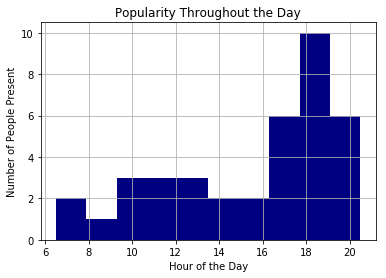

In [178]:
times = plot_day_popularity(june1_userid,june1_times)

[6.0,
 6.5,
 7.0,
 9.0,
 9.0,
 9.5,
 9.0,
 9.5,
 9.0,
 9.5,
 9.0,
 9.5,
 9.5,
 10.0,
 10.5,
 10.5,
 11.0,
 10.5,
 11.0,
 11.5,
 10.5,
 11.0,
 11.5,
 14.0,
 14.0,
 14.5,
 14.0,
 14.5,
 14.5,
 14.5,
 15.0,
 15.0,
 15.0,
 15.5,
 16.0,
 15.5,
 16.0,
 15.5,
 16.0,
 16.0,
 16.5,
 16.5,
 17.0,
 17.0,
 17.5,
 17.5,
 18.0,
 18.0,
 18.0,
 18.0,
 18.5,
 18.5,
 18.5,
 18.5,
 18.5,
 19.0,
 18.5,
 19.0,
 19.0,
 19.5,
 19.5,
 19.5,
 20.0,
 20.0,
 20.0,
 20.5,
 20.0,
 20.5,
 21.0,
 20.0,
 20.5,
 21.0,
 20.0,
 20.5,
 21.0]

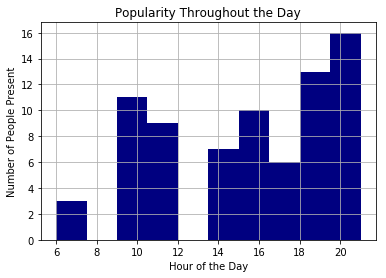

In [223]:
times = plot_day_popularity(june2_userid,june2_times)

In [234]:
find_indices(1,4,2012,dates_2012)


len(unique(users_2012[51:74]))

12

[9.0,
 9.5,
 9.0,
 9.5,
 9.0,
 9.5,
 9.0,
 9.5,
 10.0,
 9.0,
 9.5,
 10.0,
 9.0,
 9.5,
 10.0,
 10.5,
 11.0,
 11.5,
 11.0,
 11.5,
 12.0,
 12.0,
 12.5,
 14.0,
 14.0,
 14.0,
 14.5,
 14.0,
 14.5,
 15.0,
 15.0,
 15.5,
 16.0,
 15.5,
 16.0,
 15.5,
 16.0,
 16.0,
 16.5,
 16.0,
 16.5,
 16.0,
 16.5,
 17.0,
 16.0,
 16.5,
 17.0,
 16.0,
 16.5,
 17.0,
 17.5,
 18.0,
 17.5,
 18.0,
 18.5,
 17.5,
 18.0,
 18.5,
 19.0,
 19.5,
 19.5,
 19.5,
 20.0,
 19.5,
 20.0,
 19.5,
 20.0]

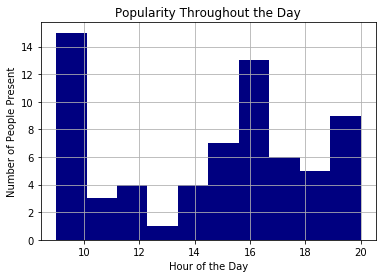

In [238]:
#print(find_indices(5,30,2016,dates_2016))
may31_times = times_2016[7355:7418]
may31_userid = users_2016[7355:7418]

june1_times = times_2016[7418:7471]
june1_userid = userid(data_2016[7418:7471])

june2_times = times_2016[7471:7574]
june2_userid = users_2016[7471:7574]

plot_day_popularity(may31_userid, may31_times)